# Clustering

__Import libraries__

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

- Clustering is the task of partitioning the dataset into groups, called clustering.
- Points within a single cluster are very similar and points in different clusters are different.
- Clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to.

---

## k-Means Clustering

- One of the simplest and commonly used clustering algorithms.
- It tries to find the cluster centers that are representative of certain regions of the data.
- The algorithms alternate between two steps:
    - Assigning each data point to the closest cluster center.
    - Setting the cluster center as the mean of the data points that are assigned to it.

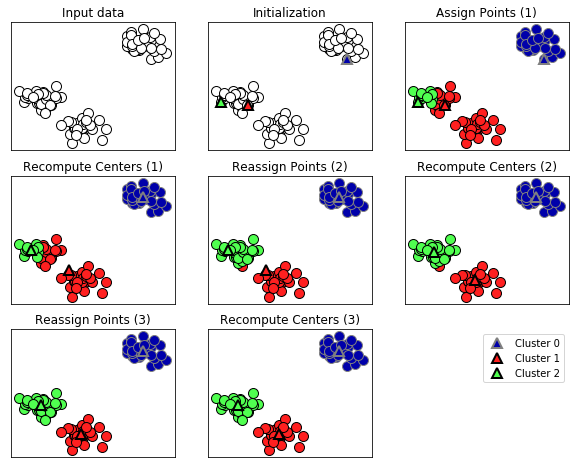

In [4]:
mglearn.plots.plot_kmeans_algorithm()

- Cluster center as triangles, data points as circles.
- We specified that we are looking for three clusters.
- Steps:
    - Assigning three random datapoints as cluster centers (Initialization).
    - Each data point is assigned to the cluster center it is closest to.
    - The cluster centers are updated to be the mean of the assigned points.
    - The process is repeated until the cluster center remain unchanged.
    

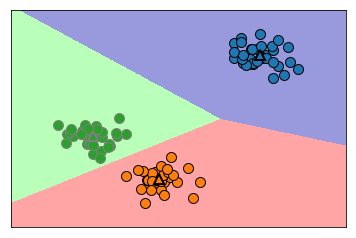

In [5]:
mglearn.plots.plot_kmeans_boundaries()

In [7]:
# generate synthetic two dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

During the algorithm, each training data point in X is assigned a cluster label. You can
find these labels in the kmeans.labels_ attribute:

In [8]:
print("Clustering memberships:\n{}".format(kmeans.labels_))

Clustering memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


We can throw new data points to kmeans, using predict method. But the existing model is not changed. Running predict on the training set returns the same result as labels_:

In [9]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- Clustering somewhat similar to classification, but there is no ground truth.

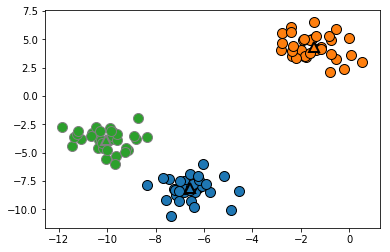

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2);

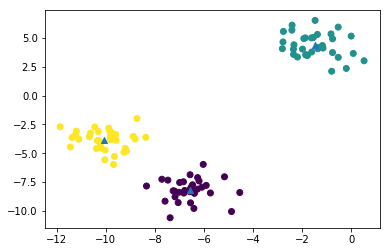

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^');

In [12]:
kmeans.cluster_centers_

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

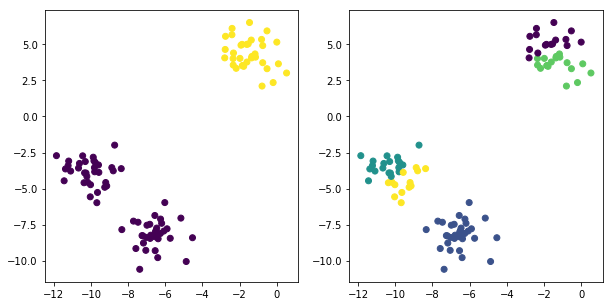

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
ax[0].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o')

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
ax[1].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o');

### Failure cases of k-means